# **Task 1**

## **Learning Period Synapse**

Resources: https://www.youtube.com/watch?v=UB3DE5Bgfx4, https://www.youtube.com/watch?v=QUT1VHiLmmI, https://www.youtube.com/watch?v=yZTBMMdPOww, https://www.youtube.com/watch?v=irHhDMbw3xo, https://www.youtube.com/watch?v=s9e2A04lmXI

Mounting Google drive

In [48]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


##**1) Import Pandas, Numpy and Matplotlib**

In [49]:
# Your code starts here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Your code ends here

## **2) Load the data**
load the titanic dataset in a pandas dataframe
(download dataset from https://www.kaggle.com/c/titanic/data and store it in a folder called "synapse_w1" in the root of your drive)
Note that you have to download the train and test csv files seperately

In [50]:
train_path = "/content/gdrive/My Drive/synapse_w1/train.csv"
test_path = "/content/gdrive/My Drive/synapse_w1/test.csv"
# Your code starts here
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)
# Your code ends here

Write code to show first five data entries of both dataframes

In [51]:
# Your code starts here
df_train.head()
df_test.head()
# Your code ends here

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## **3) Exploratory Data Analysis**
Exploratory data analysis is a very important part of ML as it helps you understand the data you are dealing with
We will be working on the training dataset here to observe and analyze the patterns of the dataset.

Pandas documentation: https://pandas.pydata.org/docs/

Numpy documentation: https://numpy.org/doc/1.23/

### 3.a. Overview of the dataset


1.   write code to list the columns in your dataframe
2.   write a function that returns the number of rows and columns in the dataset
3.   use the info() method of pandas dataframe to print the info related to the dataframe
4.   use the describe() method of pandas dataframe to print the statistical description of the dataset
5.   Find all columns that have unique values. (example : the Gender column has 2 unique values Male and Female)
if the columns have finite unique values, then add them in a dictionary of lists and print it
dictionary should look like :

  {"Gender" : ["Male", "Female"], "Col2" : ["unique1", "unique2"],...}



In [52]:
# Your code for listing columns starts here
print(df_train.columns)
# Your code ends here

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [53]:
# Your code for writing the function starts here
rows = len(df_train)
col = len(df_train.columns)
rows,col
# Your code ends here

(891, 12)

In [54]:
# Your code for using the info() method starts here
df_train.info()
# Your code ends here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [55]:
# Your code for using the describe() method starts here
df_train.describe()
# Your code ends here

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [56]:
# Your code for creating a dictionary of unique values in every column starts here
u_dict = {col:df_train[col].unique() for col in df_train.columns if len(df_train[col].unique())<10}
u_dict
# Your code ends here

{'Survived': array([0, 1]),
 'Pclass': array([3, 1, 2]),
 'Sex': array(['male', 'female'], dtype=object),
 'SibSp': array([1, 0, 3, 4, 2, 5, 8]),
 'Parch': array([0, 1, 2, 5, 3, 4, 6]),
 'Embarked': array(['S', 'C', 'Q', nan], dtype=object)}

### 3.b. Visualizing hidden Details
Aim is to find relationship between Title and Survival rate


*   print the name column of the data
*   notice that the word after the first comma encapsulates the title of the person (Mr., Mrs, etc)
*   extract the title using regular expression (help given below in the code)
*   store the title in a new column in the dataframe. Name the column : Title



In [57]:
# Your code starts here (for regex help refer next code cell)
df_train['Name']
# Your code ends here

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [58]:
# regex example
import re

name_eg = "Petranec, Miss. Matilda"
title_search = re.search('(\w+)\.', name_eg) #the first argument is a pattern that we are looking for
print("result:", title_search) #this is the result we get after looking for the pattern
if title_search:
  print("pattern found") #pattern found printed if a pattern like above is found
  title = title_search.group(1) #extracting the pattern found by regular expression (title here)
  print("title:", title)

result: <re.Match object; span=(10, 15), match='Miss.'>
pattern found
title: Miss


In [59]:
# show the new dataframe with "Title" column here
df_train["Title"] = df_train.apply(lambda row: re.search('(\w+)\.', row.Name).group(1), axis = 1)
df_train["Title"].unique()
# Your code ends here

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)



*   Write code to get unique values from the title column
*   Use the unique titles to find the number of people who survived (1) and number of people who did not (0) for each title. num_survived/total will give the survival rate for that title
*   Make a new dataframe called SR_df and add the survival rates corresponding to titles in it
  
  You may write a function for the above.
  
  
  Expected output :

  Mr    0.679392

  Capt    0.1245
  
  .
  
  .
  
  .



In [60]:
# Your code starts here
SR_df = pd.DataFrame({
    'Title': df_train['Title'].unique(),
    'Passengers':0,
    'Survivors':0,
    'Survival_Rate':0
})

for i in range(df_train.shape[0]):
  title , surv = df_train.iloc[i][["Title","Survived"]]
  SR_df.loc[SR_df["Title"]==title,"Survivors"] += surv 
  SR_df.loc[SR_df["Title"]==title,"Passengers"] += 1


SR_df["Survival_Rate"] = SR_df["Survivors"] / SR_df["Passengers"]
# Your code ends here


In [61]:
# show the new dataframe SR_df here
SR_df

,Title,Passengers,Survivors,Survival_Rate
0,Mr,517,81,0.156673
1,Mrs,125,99,0.792000
2,Miss,182,127,0.697802
3,Master,40,23,0.575000
4,Don,1,0,0.000000
5,Rev,6,0,0.000000
6,Dr,7,3,0.428571
7,Mme,1,1,1.000000
8,Ms,1,1,1.000000
9,Major,2,1,0.500000


Use SR_df to plot a bar graph for survival rate vs Title

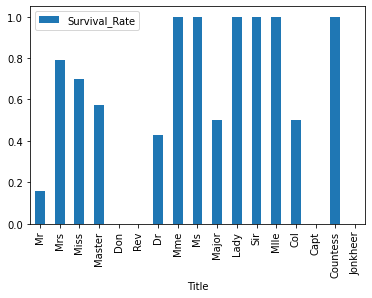

In [62]:
# Your code starts here
graph = SR_df.plot.bar(x =  'Title', y = 'Survival_Rate')
# Your code ends here

This brings us to the end of EDA.

You may feel free to do more exploratry analysis.

The aim of this notebook is not to point out every small detail but to give you an overview and guide you

## **4) Data Visualization**

Matplotlib documentation: https://matplotlib.org/stable/index.html

*   Make a pie chart to show the number of people who survived and number of people who did not
*   Make a pie chart to show the number of Males who survived and number of people who did not
*   Make a pie chart to show the number of Females who survived and number of people who did not

  Note that all three charts must be visible in a single row (look into subplots)



In [63]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [64]:
# Your code starts here
# make data
p1 = [sum(df_train['Survived']),len(df_train)-sum(df_train['Survived'])]
l1 = ['Survivors','Casualties']

p2 = [len(df_train.loc[(df_train['Survived']==1 )& (df_train['Sex']=='male')]),len(df_train.loc[(df_train['Survived']==0 )& (df_train['Sex']=='male')])]
l2 = ['Male Survivors','Male Casualties']

p3 = [len(df_train.loc[(df_train['Survived']==1 )& (df_train['Sex']=='female')]),len(df_train.loc[(df_train['Survived']==0 )& (df_train['Sex']=='female')])]
l3 = ['Female Survivors','Female Casualties']


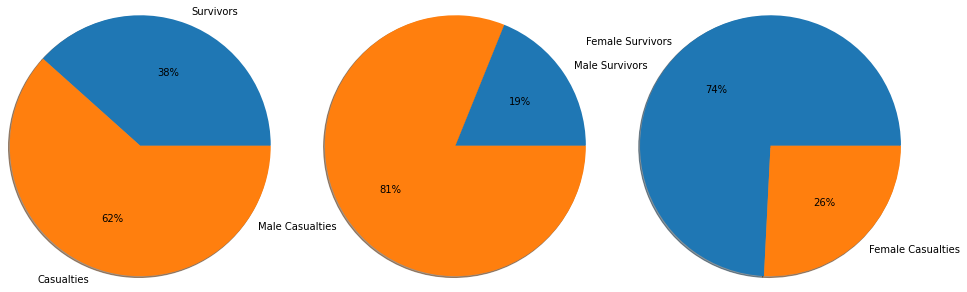

In [65]:

# plot
fig, (g1,g2,g3) = plt.subplots(1,3,figsize=(16,3))


g1.pie(p1,labels = l1,radius=2,
        autopct='%.0f%%', shadow = True)


g2.pie(p2,labels = l2,radius=2,
        autopct='%.0f%%', shadow = True)

g3.pie(p3,labels = l3,radius=2,
        autopct='%.0f%%', shadow = True)
plt.show()
# Your code ends here



*   Find if money affected survival rate (fare and Pclass)
*   Make a bar graph showing Pclass vs survival rate
*   Make a KDE plot (use the sns library) and plot Fare based on the Survival (google away for this one)



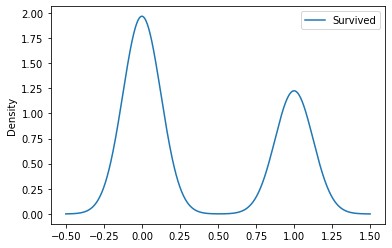

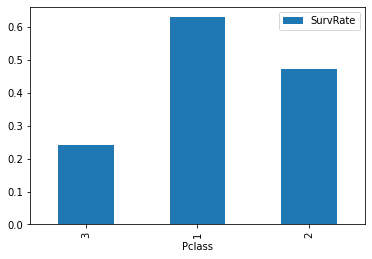

In [87]:
# Your code starts here

df_train.plot.density(x='Fare',y='Survived')

data = df_train[['Pclass','Survived']]

graph_df = pd.DataFrame(columns = ['Pclass','SurvRate'])
graph_df['Pclass'] = data['Pclass'].unique()
graph_df['SurvRate'] = [len(data.loc[(data['Pclass']==Pclass) & (data['Survived']==1)])/len(data.loc[data['Pclass']==Pclass]) for Pclass in df_train['Pclass'].unique()]



g = graph_df.plot.bar(x='Pclass',y='SurvRate')



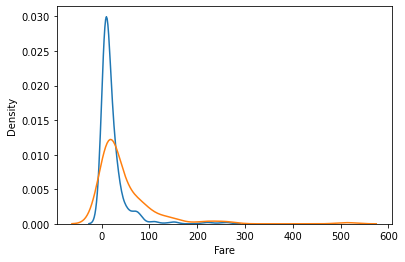

In [67]:
import seaborn as sns

kde1 = sns.kdeplot(data = df_train.loc[df_train['Survived']==0], x = 'Fare')
kde2 = sns.kdeplot(data = df_train.loc[df_train['Survived']==1], x = 'Fare')

plt.show()


## **5) Preprocessing**
Preprocessing is an important step before we step into modelling. It is a step that prevents the Rubbish in Rubbish out concept of flawed data.
*   when we added the Title column in the datadframe, we did preprocessing on the existing data to extract relevant information. As we also tried to explore and understand the data using survival rate, we saw it under EDA.

### 5.a. Removing unnecessary columns
*   The columns PassengerId and Ticket play no logical role in being related to the survival of a passenger. Hence we will remove them.
*   We will also remove the Name column as we have done feature extraction and obtained titles instead. (test set might have extra titles which are not in the train set. Think about how we would consider them. This however doesn't affect task 1's objective)

In [68]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [69]:
# Your code to rmove the unnecessary columns starts here
df_train.drop(['PassengerId', 'Ticket'], axis = 1, inplace = True) 
# Your code ends here

### 5.b. Nan analysis
*   write code to find the percentage of Nans in each column and visualize it in a tabular format
*   remove any column having more than 50% Nans as they would be of no use

In [70]:
df_train.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
Title         0
dtype: int64

In [71]:
# Your code starts here
df_na = pd.DataFrame({'Col':df_train.columns,'Percentage':[(1-(x/len(df_train)))*100 for x in list(df_train.isna().sum())]})
df_na

,Col,Percentage
0,Survived,100.000000
1,Pclass,100.000000
2,Name,100.000000
3,Sex,100.000000
4,Age,80.134680
5,SibSp,100.000000
6,Parch,100.000000
7,Fare,100.000000
8,Cabin,22.895623
9,Embarked,99.775533


In [72]:
for idx,row in df_na.iterrows():
  if row["Percentage"] < 50:
    df_train.drop(row['Col'], axis = 1, inplace = True)
df_train
# Your code ends here

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,Rev
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,Miss
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S,Miss
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,Mr


*   Fill Nans in the Embark column with the statistical mode
*   Fill Nans in the Age column with it's statistical mean

In [73]:
# Your code starts here
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace = True)
df_train['Age'].fillna(df_train['Age'].mean(), inplace = True)
df_train
# Your code ends here

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,13.0000,S,Rev
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,30.0000,S,Miss
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,23.4500,S,Miss
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,30.0000,C,Mr


*   show the new Nan percentage vs column name table after filling and removing to make sure there are no Nans

In [74]:
# Your code starts here
df_na = pd.DataFrame({'Col':df_train.columns,'Percentage NaN':[((x/len(df_train)))*100 for x in list(df_train.isna().sum())]})
df_na
# Your code ends here

,Col,Percentage NaN
0,Survived,0.0
1,Pclass,0.0
2,Name,0.0
3,Sex,0.0
4,Age,0.0
5,SibSp,0.0
6,Parch,0.0
7,Fare,0.0
8,Embarked,0.0
9,Title,0.0


### 5.c. Adding features to the dataset
*   Read the kaggle link (titanic dataset) provided above and see what the two columns SibSP and Parch signify
*   Using that create a new column called **Family_members**
*   Fill it with the sum of SibSP and Parch

In [75]:
# Your code starts here
df_train['Family_members'] = df_train.apply(lambda row: row['SibSp']+row['Parch'],axis = 1)
df_train
# Your code ends here

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_members
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,S,Mr,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C,Mrs,1
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,S,Miss,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,S,Mrs,1
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,S,Mr,0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,13.0000,S,Rev,0
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,30.0000,S,Miss,0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,23.4500,S,Miss,3
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,30.0000,C,Mr,0


### 5.d. Scaling and Normalization
We don't want to give undue advantage to a few columns (when training models), just because they have a numeric data that is larger in magnitude.
Therefore we scale all values down to a specific range or distribution

Columns to apply scaling on:
*   Age
*   Fare
*   Family_members

Although Pclass column is numeric, it contains classification data (only 1, 2 and 3). Therefore only continuous data like age, fare, etc needs to be normalized.
Read about standardization and normalization in this link https://www.geeksforgeeks.org/normalization-vs-standardization/ .
Apply the formulas given in the link above and scale/normalize the features that are supposed to be scaled
It is your choice to choose wether you choose to normalize or standardize a column. You will be able to make your choice after reading the link contents.
If you feel confused with the choice, then you can go ahead and directly normalize.

In [76]:
# Your code starts here
def normalise(df,*col):
  for c in col:
    df[c] = df[c].apply(lambda x: (x - df[c].min())/(df[c].max() - df[c].min()))

normalise(df_train,'Age','Fare','Family_members')
df_train
# Your code ends here

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_members
0,0,3,"Braund, Mr. Owen Harris",male,0.271174,1,0,0.014151,S,Mr,0.1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.472229,1,0,0.139136,C,Mrs,0.1
2,1,3,"Heikkinen, Miss. Laina",female,0.321438,0,0,0.015469,S,Miss,0.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.434531,1,0,0.103644,S,Mrs,0.1
4,0,3,"Allen, Mr. William Henry",male,0.434531,0,0,0.015713,S,Mr,0.0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,0.334004,0,0,0.025374,S,Rev,0.0
887,1,1,"Graham, Miss. Margaret Edith",female,0.233476,0,0,0.058556,S,Miss,0.0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.367921,1,2,0.045771,S,Miss,0.3
889,1,1,"Behr, Mr. Karl Howell",male,0.321438,0,0,0.058556,C,Mr,0.0


### 5.e. One hot encoding
Machine Learning models do not understand strings, they understand numbers, that is one of the reasons why we one hot encode few columns
refer this link for more information : https://datagy.io/pandas-get-dummies/

you can use this or directly look into pandas get_dummies() method to implement this

Columns to apply one_hot encoding on:
*   Pclass
*   Sex
*   Title
*   Embarked

In [77]:
# Your code starts here
ohe_df = pd.get_dummies(df_train,columns=['Pclass','Sex','Title','Embarked'])
# Your code ends here

In [78]:
# Show your final dataframe here
ohe_df

,Survived,Name,Age,SibSp,Parch,Fare,Family_members,Pclass_1,Pclass_2,Pclass_3,...,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Embarked_C,Embarked_Q,Embarked_S
0,0,"Braund, Mr. Owen Harris",0.271174,1,0,0.014151,0.1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.472229,1,0,0.139136,0.1,1,0,0,...,0,0,0,1,0,0,0,1,0,0
2,1,"Heikkinen, Miss. Laina",0.321438,0,0,0.015469,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.434531,1,0,0.103644,0.1,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0,"Allen, Mr. William Henry",0.434531,0,0,0.015713,0.0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,"Montvila, Rev. Juozas",0.334004,0,0,0.025374,0.0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
887,1,"Graham, Miss. Margaret Edith",0.233476,0,0,0.058556,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
888,0,"Johnston, Miss. Catherine Helen ""Carrie""",0.367921,1,2,0.045771,0.3,0,0,1,...,0,0,0,0,0,0,0,0,0,1
889,1,"Behr, Mr. Karl Howell",0.321438,0,0,0.058556,0.0,1,0,0,...,0,0,1,0,0,0,0,1,0,0


## Bonus: You can research on the topic of Standardization vs Normalization **only if** you are done with the task, the best research will be edited and featured on the Synapse Instagram page. You can contact us for any doubts regarding this as well! Happy coding! :)